Лабораторная 4

Информация о диабете индейцев Пима

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config

set_config(transform_output="pandas")
df = pd.read_csv(".//scv//diabetes.csv")
print(df.columns)
df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Формирование выборок

In [268]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Outcome", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=9
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
196            1      105             58              0        0  24.3   
69             4      146             85             27      100  28.9   
494            3       80              0              0        0   0.0   
463            5       88             78             30        0  27.6   
653            2      120             54              0        0  26.8   
..           ...      ...            ...            ...      ...   ...   
322            0      124             70             20        0  27.4   
109            0       95             85             25       36  37.4   
27             1       97             66             15      140  23.2   
651            1      117             60             23      106  33.8   
197            3      107             62             13       48  22.9   

     DiabetesPedigreeFunction  Age  Outcome  
196                     0.187   21        0  
69                      0.189   27        0  
494                     0.174   22        0  
463                     0.258   37        0  
653                     0.455   27        0  
..                        ...  ...      ...  
322                     0.254   36        1  
109                     0.247   24        1  
27                      0.487   22        0  
651                     0.466   27        0  
197                     0.678   23        1  

[614 rows x 9 columns]

'y_train'

Outcome
196        0
69         0
494        0
463        0
653        0
..       ...
322        1
109        1
27         0
651        0
197        1

[614 rows x 1 columns]

'X_test'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
669            9      154             78             30      100  30.9   
379            0       93            100             39       72  43.4   
640            0      102             86             17      105  29.3   
658           11      127            106              0        0  39.0   
304            3      150             76              0        0  21.0   
..           ...      ...            ...            ...      ...   ...   
203            2       99             70             16       44  20.4   
605            1      124             60             32        0  35.8   
561            0      198             66             32      274  41.3   
280            0      146             70              0        0  37.9   
103            1       81             72             18       40  26.6   

     DiabetesPedigreeFunction  Age  Outcome  
669                     0.164   45        0  
379                     1.021   35        0  
640                     0.695   27        0  
658                     0.190   51        0  
304                     0.207   37        0  
..                        ...  ...      ...  
203                     0.235   27        0  
605                     0.514   21        0  
561                     0.502   28        1  
280                     0.334   28        1  
103                     0.283   24        0  

[154 rows x 9 columns]

'y_test'

Outcome
669        0
379        0
640        0
658        0
304        0
..       ...
203        0
605        0
561        1
280        1
103        0

[154 rows x 1 columns]

In [269]:
null_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)

Пропущенные значения по столбцам:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Статистический обзор данных:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000

Выбросы в датасете:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
12            10      139             80              0        0  27.1   
39             4      111             72             47      207  37.1   
45             0      180             66             39        0  42.0   
58             0      146             82              0        0  40.5   
100            1      163             72              0        0  39.0   
147            2      106             64             35      119  30.5   
187            1      128             98             41       58  32.0   
218            5       85             74             22        0  29.0   
228            4      197             70             39      744  36.7   
243            6      119             50             22      176  27.1   
245            9      184             85             15        0  30.0   
259           11  

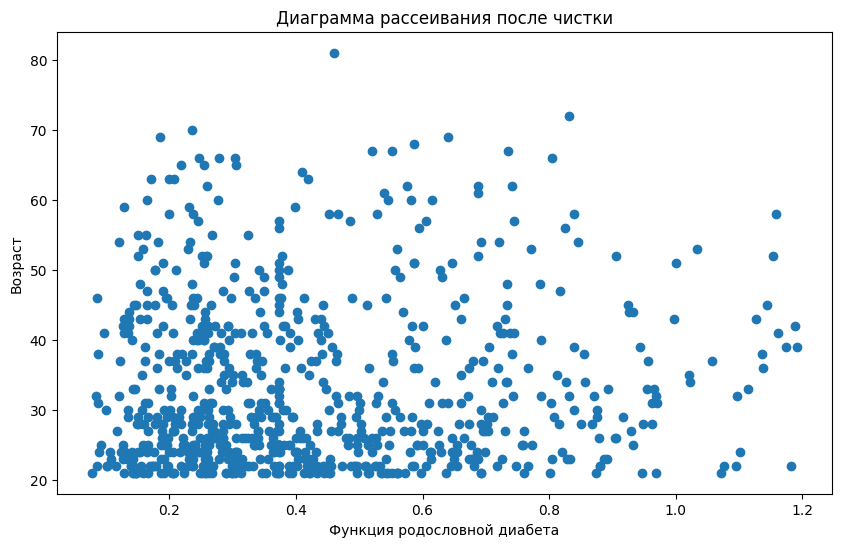

In [270]:
Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (df["DiabetesPedigreeFunction"] < lower_bound) | (df["DiabetesPedigreeFunction"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(df[outliers])

# Заменяем выбросы на медианные значения
median_score = df["DiabetesPedigreeFunction"].median()
df.loc[outliers, "DiabetesPedigreeFunction"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'])
plt.xlabel('Функция родословной диабета')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Классификация данных

In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



columns_to_drop = ["Pregnancies", "SkinThickness", "BloodPressure", "Outcome", "DiabetesPedigreeFunction"]
num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype != "object"
]
cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)


pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

Проверка работы конвеера

In [272]:

preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

Glucose   Insulin       BMI       Age
196 -0.478144 -0.688684 -0.946400 -1.029257
69   0.818506  0.180416 -0.377190 -0.522334
494 -1.268784 -0.688684 -3.953317 -0.944770
463 -1.015779 -0.688684 -0.538054  0.322537
653 -0.003760 -0.688684 -0.637047 -0.522334
..        ...       ...       ...       ...
322  0.122742 -0.688684 -0.562802  0.238050
109 -0.794400 -0.375808  0.674613 -0.775796
27  -0.731149  0.528056 -1.082516 -0.944770
651 -0.098637  0.232562  0.229143 -0.522334
197 -0.414893 -0.271516 -1.119638 -0.860283

[614 rows x 4 columns]

Формирование набора моделей для классификации

In [273]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=9)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=9
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=9,
        )
    },
}

Обучение моделей на обучающем наборе данных и оценка на тестовом

In [274]:
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


Сводная таблица оценок качества для использованных моделей классификации

Матрица неточностей

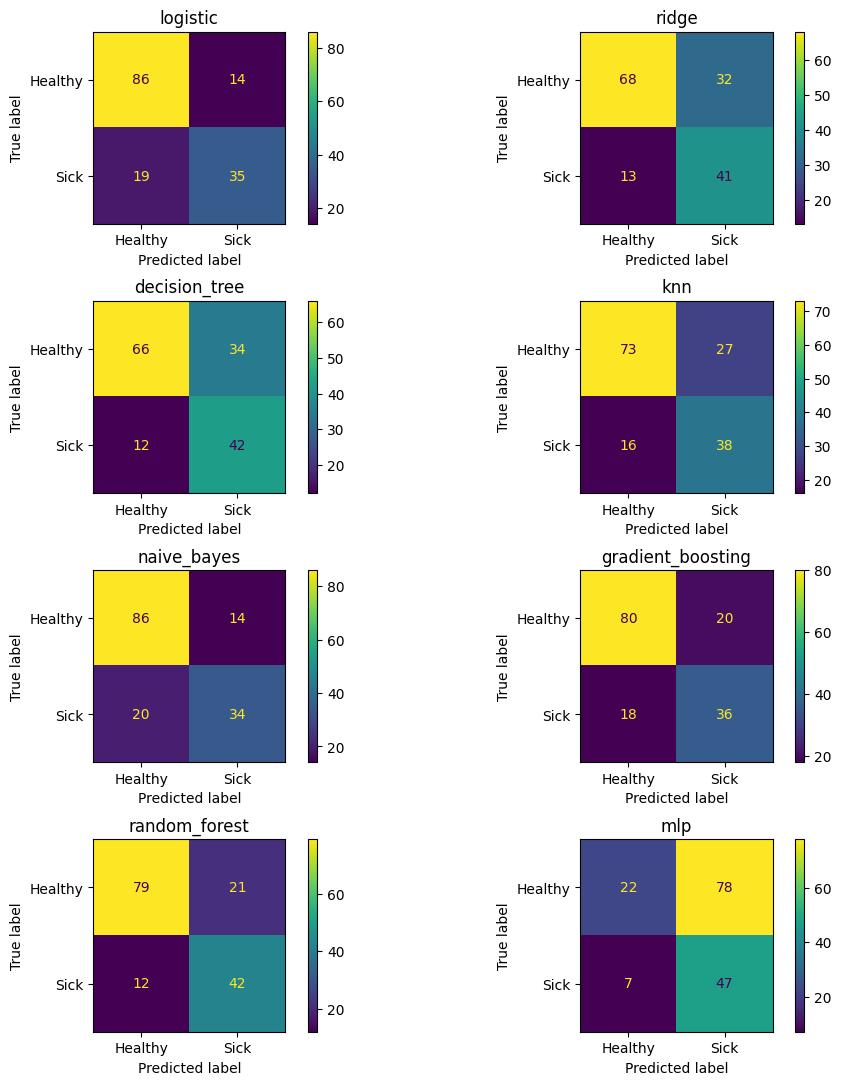

In [275]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Healthy", "Sick"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Точность, полнота, верность (аккуратность), F-мера

In [276]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [277]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

In [278]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'random_forest'

Вывод данных с ошибкой предсказания для оценки

In [279]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Outcome"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 33'

Pregnancies  Predicted  Glucose  BloodPressure  SkinThickness  Insulin  \
46             1          1      146             56              0        0   
86            13          1      106             72             54        0   
91             4          1      123             80             15      176   
95             6          1      144             72             27      228   
125            1          0       88             30             42       99   
167            4          1      120             68              0        0   
188            8          0      109             76             39      114   
204            6          1      103             72             32      190   
228            4          1      197             70             39      744   
274           13          1      106             70              0        0   
280            0          0      146             70              0        0   
282            7          1      133             88             15      155   
309            2          0      124             68             28      205   
335            0          1      165             76             43      255   
363            4          0      146             78              0        0   
397            0          0      131             66             40        0   
510           12          0       84             72             31        0   
517            7          1      125             86              0        0   
536            0          1      105             90              0        0   
541            3          0      128             72             25      190   
549            4          1      189            110             31        0   
568            4          1      154             72             29      126   
577            2          0      118             80              0        0   
583            8          1      100             76              0        0   
590           11          0      111             84             40        0   
594            6          1      123             72             45      230   
622            6          1      183             94              0        0   
630            7          0      114             64              0        0   
658           11          1      127            106              0        0   
669            9          1      154             78             30      100   
725            4          1      112             78             40        0   
744           13          1      153             88             37      140   
750            4          0      136             70              0        0   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
46   29.7                     0.564   29        0  
86   36.6                     0.178   45        0  
91   32.0                     0.443   34        0  
95   33.9                     0.255   40        0  
125  55.0                     0.496   26        1  
167  29.6                     0.709   34        0  
188  27.9                     0.640   31        1  
204  37.7                     0.324   55        0  
228  36.7                     2.329   31        0  
274  34.2                     0.251   52        0  
280  37.9                     0.334   28        1  
282  32.4                     0.262   37        0  
309  32.9                     0.875   30        1  
335  47.9                     0.259   26        0  
363  38.5                     0.520   67        1  
397  34.3                     0.196   22        1  
510  29.7                     0.297   46        1  
517  37.6                     0.304   51        0  
536  29.6                     0.197   46        0  
541  32.4                     0.549   27        1  
549  28.5                     0.680   37        0  
568  31.3                     0.338   37        0  
577  42.9                     0.693   21        1  
583  38.7                     0.190   42        0  
590  46.8         

Пример использования обученной модели (конвейера) для предсказания

In [280]:
model = class_models[best_model]["pipeline"]

example_id = 450
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
450          1.0     82.0           64.0           13.0     95.0  21.2   

     DiabetesPedigreeFunction   Age  Outcome  
450                     0.415  23.0      0.0

Glucose   Insulin       BMI       Age
450 -1.205533  0.136961 -1.329999 -0.860283

'predicted: 0 (proba: [0.96 0.04])'

'real: 0'

Подбор гиперпараметров методом поиска по сетке

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics
import pandas as pd


# Определяем числовые признаки
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Установка random_state
random_state = 9

# Определение трансформера
pipeline_end = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
    # Добавьте другие трансформеры, если требуется
])

# Объявление модели
optimized_model = RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=10,
)

# Создание пайплайна с корректными шагами
result = {}

# Обучение модели
result["pipeline"] = Pipeline([
    ("pipeline", pipeline_end),
    ("model", optimized_model)
]).fit(X_train, y_train.values.ravel())

# Прогнозирование и расчет метрик
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

# Метрики для оценки модели
result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [282]:
optimized_model_type = "random_forest"
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [283]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [284]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

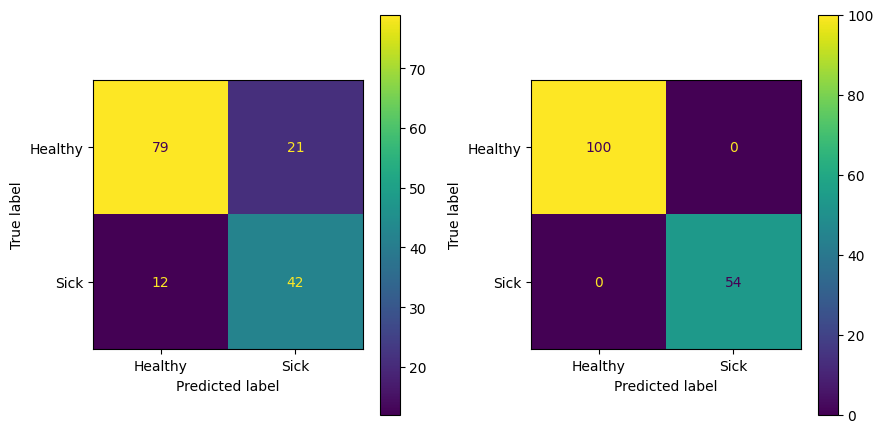

In [285]:


_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Healthy", "Sick"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()



В желтом квадрате мы видим значение 79, что обозначает количество правильно классифицированных объектов, отнесенных к классу "Sick". Это свидетельствует о том, что модель успешно идентифицирует объекты этого класса, минимизируя количество ложных положительных срабатываний.

В зеленом квадрате значение 42 указывает на количество правильно классифицированных объектов, отнесенных к классу "Healthy". Это также является показателем хорошей точности модели в определении объектов данного класса.

Определение достижимого уровня качества модели для второй задачи

Подготовка данных

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config


random_state = 9
set_config(transform_output="pandas")
df = pd.read_csv(".//scv//diabetes.csv")
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Формирование выборок

In [287]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split


def split_stratified_into_train_val_test(
    df_input: DataFrame,
    stratify_colname: str = "y",
    frac_train: float = 0.6,
    frac_val: float = 0.15,
    frac_test: float = 0.25,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   

    if not (0 < frac_train < 1) or not (0 <= frac_val <= 1) or not (0 <= frac_test <= 1):
        raise ValueError("Fractions must be between 0 and 1 and the sum must equal 1.")
    
    if not (frac_train + frac_val + frac_test == 1.0):
        raise ValueError("fractions %f, %f, %f do not add up to 1.0" %
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError(f"{stratify_colname} is not a column in the DataFrame.")

    X = df_input
    y = df_input[[stratify_colname]]

 
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    if frac_val == 0:
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp

    relative_frac_test = frac_test / (frac_val + frac_test)

    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    
    return df_train, df_val, df_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Outcome", frac_train=0.80, frac_val=0.0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)
display("X_test", X_test)
display("y_test", y_test)

'X_train'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
196            1      105             58              0        0  24.3   
69             4      146             85             27      100  28.9   
494            3       80              0              0        0   0.0   
463            5       88             78             30        0  27.6   
653            2      120             54              0        0  26.8   
..           ...      ...            ...            ...      ...   ...   
322            0      124             70             20        0  27.4   
109            0       95             85             25       36  37.4   
27             1       97             66             15      140  23.2   
651            1      117             60             23      106  33.8   
197            3      107             62             13       48  22.9   

     DiabetesPedigreeFunction  Age  Outcome  
196                     0.187   21        0  
69                      0.189   27        0  
494                     0.174   22        0  
463                     0.258   37        0  
653                     0.455   27        0  
..                        ...  ...      ...  
322                     0.254   36        1  
109                     0.247   24        1  
27                      0.487   22        0  
651                     0.466   27        0  
197                     0.678   23        1  

[614 rows x 9 columns]

'y_train'

Outcome
196        0
69         0
494        0
463        0
653        0
..       ...
322        1
109        1
27         0
651        0
197        1

[614 rows x 1 columns]

'X_test'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
669            9      154             78             30      100  30.9   
379            0       93            100             39       72  43.4   
640            0      102             86             17      105  29.3   
658           11      127            106              0        0  39.0   
304            3      150             76              0        0  21.0   
..           ...      ...            ...            ...      ...   ...   
203            2       99             70             16       44  20.4   
605            1      124             60             32        0  35.8   
561            0      198             66             32      274  41.3   
280            0      146             70              0        0  37.9   
103            1       81             72             18       40  26.6   

     DiabetesPedigreeFunction  Age  Outcome  
669                     0.164   45        0  
379                     1.021   35        0  
640                     0.695   27        0  
658                     0.190   51        0  
304                     0.207   37        0  
..                        ...  ...      ...  
203                     0.235   27        0  
605                     0.514   21        0  
561                     0.502   28        1  
280                     0.334   28        1  
103                     0.283   24        0  

[154 rows x 9 columns]

'y_test'

Outcome
669        0
379        0
640        0
658        0
304        0
..       ...
203        0
605        0
561        1
280        1
103        0

[154 rows x 1 columns]

Формирование конвейера для классификации данных

In [288]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

class DiabetFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    

columns_to_drop = ["Pregnancies", "SkinThickness", "Insulin", "BMI", "Outcome"]
num_columns = ["Glucose", "Age", "BloodPressure", "DiabetesPedigreeFunction"]
cat_columns = []

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)


drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, ["Cabin_type"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

Демонстрация работы конвейера

In [289]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

Glucose       Age  BloodPressure  DiabetesPedigreeFunction
196 -0.478144 -1.029257      -0.554050                 -0.849205
69   0.818506 -0.522334       0.804885                 -0.843172
494 -1.268784 -0.944770      -3.473244                 -0.888421
463 -1.015779  0.322537       0.452568                 -0.635028
653 -0.003760 -0.522334      -0.755374                 -0.040763
..        ...       ...            ...                       ...
322  0.122742  0.238050       0.049921                 -0.647095
109 -0.794400 -0.775796       0.804885                 -0.668211
27  -0.731149 -0.944770      -0.151403                  0.055767
651 -0.098637 -0.522334      -0.453388                 -0.007581
197 -0.414893 -0.860283      -0.352726                  0.631933

[614 rows x 4 columns]

Формирование набора моделей для классификации

In [290]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

Обучение моделей на обучающем наборе данных и оценка на тестовом¶

In [291]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic


Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


Сводная таблица оценок качества для использованных моделей классификации¶

Матрица неточностей


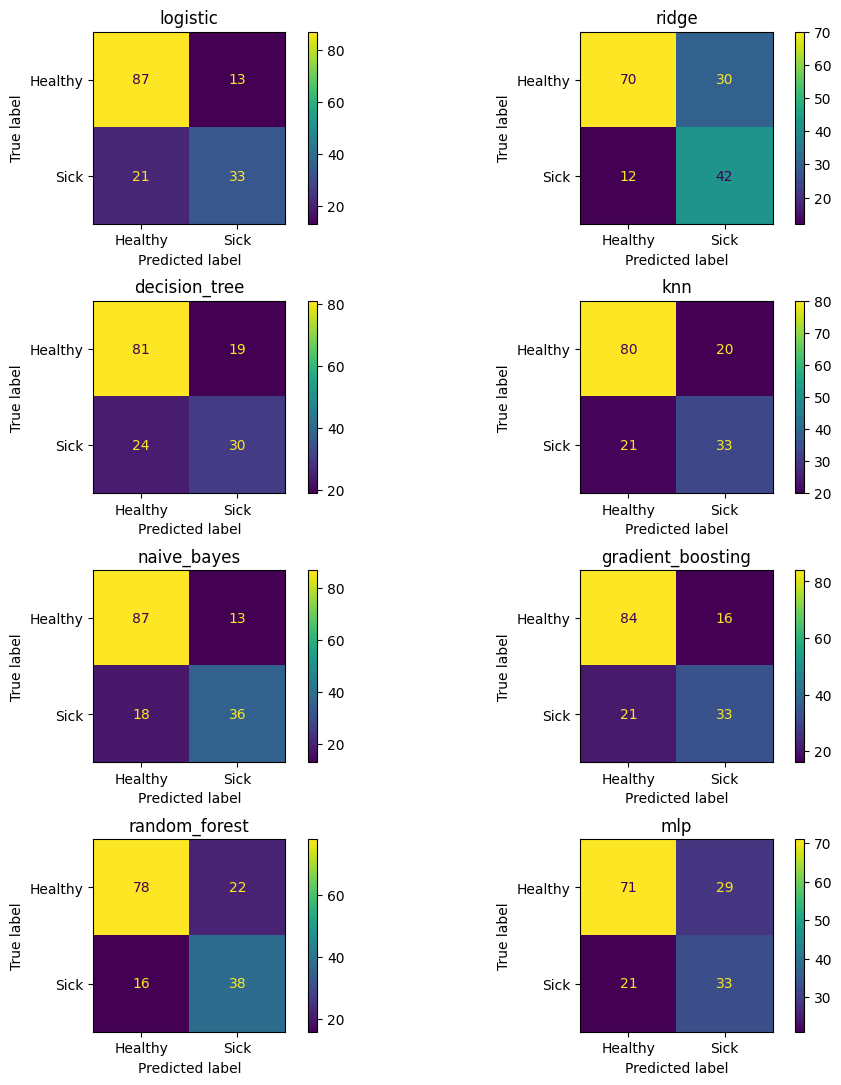

In [292]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Healthy", "Sick"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

In [293]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)



Почти все модели, включая логистическую регрессию, ридж-регрессию, KNN, наивный байесовский классификатор, многослойную перцептронную сеть, случайный лес, дерево решений и градиентный бустинг, демонстрируют 100% точность (1.000000) на обучающей выборке. Это указывает на то, что модели смогли подстроиться под обучающие данные, что может указывать на возможное переобучение.

ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса


In [294]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

In [295]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'naive_bayes'

Вывод данных с ошибкой предсказания для оценки

In [296]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Outcome"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 31'

Pregnancies  Predicted  Glucose  BloodPressure  SkinThickness  Insulin  \
64             7          0      114             66              0        0   
88            15          0      136             70             32      110   
125            1          0       88             30             42       99   
143           10          0      108             66              0        0   
170            6          0      102             82              0        0   
188            8          0      109             76             39      114   
199            4          0      148             60             27      318   
214            9          0      112             82             32      175   
223            7          1      142             60             33      190   
228            4          1      197             70             39      744   
280            0          0      146             70              0        0   
294            0          1      161             50              0        0   
304            3          1      150             76              0        0   
309            2          0      124             68             28      205   
335            0          1      165             76             43      255   
395            2          1      127             58             24      275   
397            0          0      131             66             40        0   
401            6          1      137             61              0        0   
406            4          0      115             72              0        0   
510           12          0       84             72             31        0   
541            3          0      128             72             25      190   
549            4          1      189            110             31        0   
568            4          1      154             72             29      126   
577            2          0      118             80              0        0   
622            6          1      183             94              0        0   
630            7          0      114             64              0        0   
658           11          1      127            106              0        0   
669            9          1      154             78             30      100   
693            7          0      129             68             49      125   
730            3          0      130             78             23       79   
744           13          1      153             88             37      140   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
64   32.8                     0.258   42        1  
88   37.1                     0.153   43        1  
125  55.0                     0.496   26        1  
143  32.4                     0.272   42        1  
170  30.8                     0.180   36        1  
188  27.9                     0.640   31        1  
199  30.9                     0.150   29        1  
214  34.2                     0.260   36        1  
223  28.8                     0.687   61        0  
228  36.7                     2.329   31        0  
280  37.9                     0.334   28        1  
294  21.9                     0.254   65        0  
304  21.0                     0.207   37        0  
309  32.9                     0.875   30        1  
335  47.9                     0.259   26        0  
395  27.7                     1.600   25        0  
397  34.3                     0.196   22        1  
401  24.2                     0.151   55        0  
406  28.9                     0.376   46        1  
510  29.7                     0.297   46        1  
541  32.4                     0.549   27        1  
549  28.5                     0.680   37        0  
568  31.3                     0.338   37        0  
577  42.9                     0.693   21        1  
622  40.8                     1.461   45        0  
630  27.4                     0.732   34        1  
658  39.0                     0.190   51        0  
669  30.9           

Пример использования обученной модели (конвейера) для предсказания

In [297]:
model = class_models[best_model]["pipeline"]

example_id = 555
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
555          7.0    124.0           70.0           33.0    215.0  25.5   

     DiabetesPedigreeFunction   Age  Outcome  
555                     0.161  37.0      0.0

Glucose       Age  BloodPressure  DiabetesPedigreeFunction
555  0.122742  0.322537       0.049921                 -0.927636

'predicted: 0 (proba: [0.7669925 0.2330075])'

'real: 0'

Подбор гиперпараметров методом поиска по сетке

In [298]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 7,
 'model__max_features': 'sqrt',
 'model__n_estimators': 50}

Обучение модели с новыми гиперпараметрами

In [299]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="log2",
    n_estimators=10,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [300]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [301]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [302]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

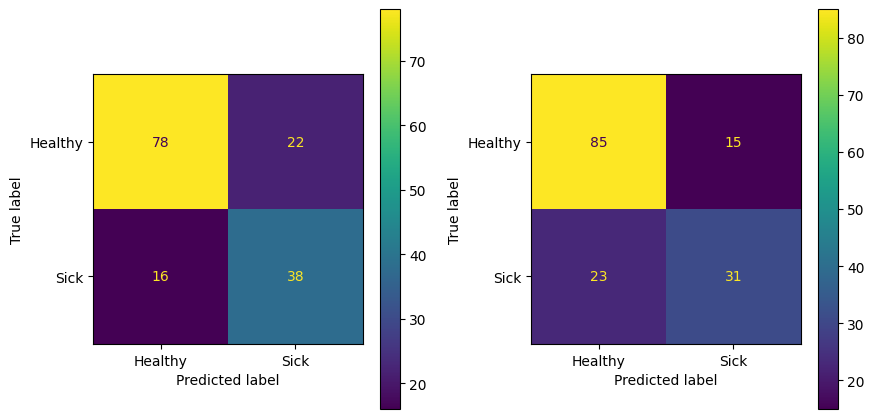

In [303]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Healthy", "Sick"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

Регрессионная модель

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config

random_state=9
set_config(transform_output="pandas")
df = pd.read_csv(".//scv//diabetes.csv")
print(df.columns)
df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Разделение набора данных на обучающую и тестовые выборки

In [305]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_into_train_test(
    df_input: DataFrame,
    target_colname: str = "Outcome",
    frac_train: float = 0.8,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Проверка наличия целевого признака
    if target_colname not in df_input.columns:
        raise ValueError(f"{target_colname} is not a column in the DataFrame.")
    
    # Разделяем данные на признаки и целевую переменную
    X = df_input.drop(columns=[target_colname])  # Признаки
    y = df_input[[target_colname]]  # Целевая переменная

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

# Применение функции для разделения данных
X_train, X_test, y_train, y_test = split_into_train_test(
    df, 
    target_colname="Outcome", 
    frac_train=0.8, 
    random_state=42  # Убедитесь, что вы задали нужное значение random_state
)

# Для отображения результатов
display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  
..                        ...  ...  
71                      0.411   26  
106                     0.207   27  
270                     1.136   38  
435                     0.205   29  
102                     0.262   21  

[614 rows x 8 columns]

'y_train'

Outcome
60         0
618        1
346        0
294        0
231        1
..       ...
71         0
106        0
270        1
435        1
102        0

[614 rows x 1 columns]

'X_test'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
355            9      165             88              0        0  30.4   
534            1       77             56             30       56  33.3   
344            8       95             72              0        0  36.8   
296            2      146             70             38      360  28.0   
462            8       74             70             40       49  35.3   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  
624                     0.158   21  
690                     0.856   34  
473                     0.210   50  
..                        ...  ...  
355                     0.302   49  
534                     1.251   24  
344                     0.485   57  
296                     0.337   29  
462                     0.705   39  

[154 rows x 8 columns]

'y_test'

Outcome
668        0
324        0
624        0
690        0
473        0
..       ...
355        1
534        0
344        0
296        1
462        0

[154 rows x 1 columns]

Определение перечня алгоритмов решения задачи аппроксимации (регрессии)

In [306]:


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, tree, neighbors, ensemble, neural_network

random_state = 9

models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
    "mlp": {
        "model": neural_network.MLPRegressor(
            activation="tanh",
            hidden_layer_sizes=(3,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}



In [307]:
import math
from pandas import DataFrame
from sklearn import metrics

for model_name in models.keys():
    print(f"Model: {model_name}")

    fitted_model = models[model_name]["model"].fit(
        X_train.values, y_train.values.ravel()
    )
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred
    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

Model: linear
Model: linear_poly
Model: linear_interact
Model: ridge
Model: decision_tree
Model: knn
Model: random_forest
Model: mlp


Вывод результатов оценки

In [308]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])


Вывод реального и "спрогнозированного" результата для обучающей и тестовой выборок

Получение лучшей модели


In [309]:
best_model = str(reg_metrics.sort_values(by="RMSE_test").iloc[0].name)

display(best_model)

'random_forest'

Подбор гиперпараметров методом поиска по сетке

In [310]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Используем регрессор
from sklearn.preprocessing import StandardScaler


df.dropna(inplace=True) 
# Предикторы и целевая переменная
X = df[["Glucose", "Age", "BloodPressure", "DiabetesPedigreeFunction"]]
y = df['Outcome']  # Целевая переменная для регрессии


model = RandomForestRegressor() 

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10]  
}

# 3. Подбор гиперпараметров с помощью Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
grid_search.fit(X_train, y_train)

# 4. Результаты подбора гиперпараметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Лучший результат (MSE): 0.15427721639903466


Обучение модели с новыми гиперпараметрами и сравнение новых и старых данных

In [319]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


old_param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]   # Минимальное количество образцов для разбиения узла
}

old_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=old_param_grid,
                                scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

old_grid_search.fit(X_train, y_train)

old_best_params = old_grid_search.best_params_
old_best_mse = -old_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

new_param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [10]
}

new_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

new_grid_search.fit(X_train, y_train)

new_best_params = new_grid_search.best_params_
new_best_mse = -new_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train, y_train)

model_oldbest = RandomForestRegressor(**old_best_params)
model_oldbest.fit(X_train, y_train)

y_pred = model_best.predict(X_test)
y_oldpred = model_oldbest.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarni

Старые параметры: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Лучший результат (MSE) на старых параметрах: 0.1543002886456971

Новые параметры: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Лучший результат (MSE) на новых параметрах: 0.15791709286040012
Среднеквадратическая ошибка (MSE) на тестовых данных: 0.16712438177283198
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 0.408808490338486


Визуализация

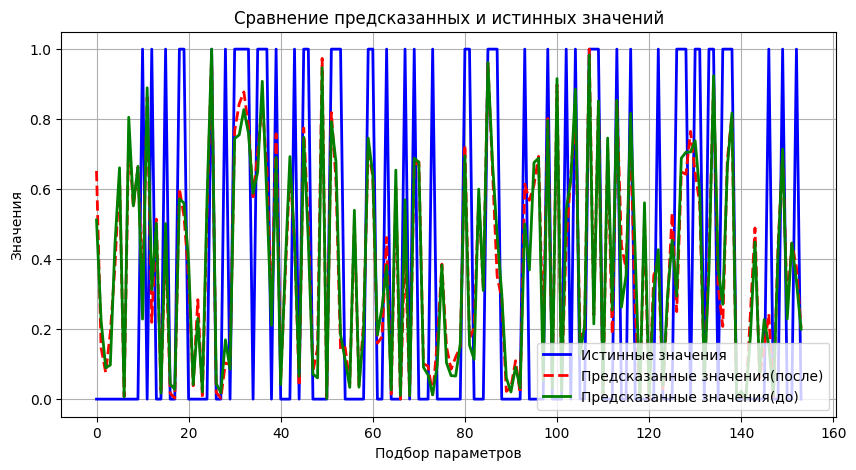

In [329]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Истинные значения', color='blue', linewidth=2)
plt.plot(y_oldpred, label='Предсказанные значения(после)', color='red', linestyle='--', linewidth=2)
plt.plot(y_pred, label='Предсказанные значения(до)', color='green', linestyle='-', linewidth=2)

plt.title('Сравнение предсказанных и истинных значений')
plt.xlabel('Подбор параметров')
plt.ylabel('Значения')
plt.grid()
plt.legend( loc ='lower right')
plt.show()